In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import sklearn

In [45]:
startup=pd.read_csv("50_Startups.csv")
startup

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [46]:
startup.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [47]:
startup.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [48]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [49]:
startup1=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup1

RDS       ADMS       MKTS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41
49       0.00  116983.80   45173.06  California   14681.40

In [50]:
startup1[startup1.duplicated()]

Empty DataFrame
Columns: [RDS, ADMS, MKTS, State, Profit]
Index: []

In [51]:
startup.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

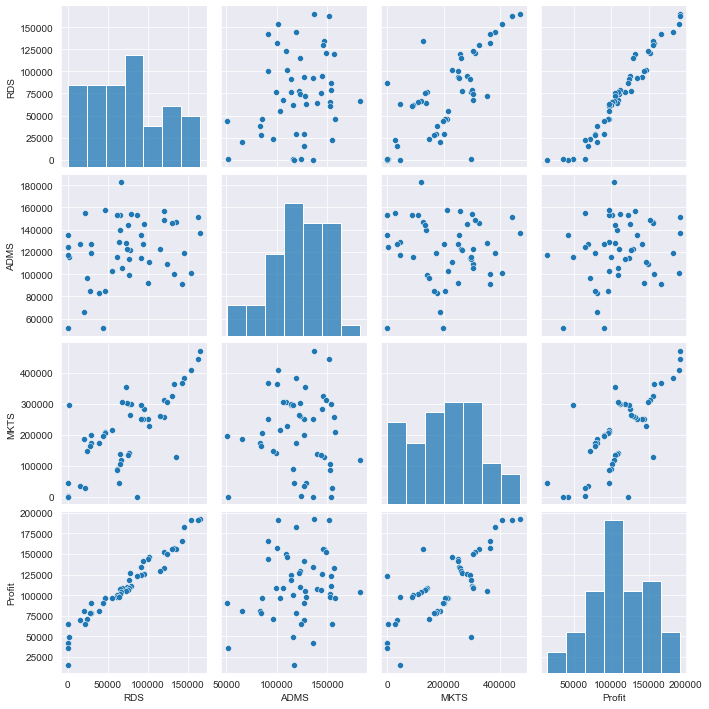

In [52]:
sns.set_style(style='darkgrid')
sns.pairplot(startup1)

In [53]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup1).fit()

In [54]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [55]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [56]:
(model.rsquared , model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [57]:
slr_a=smf.ols("Profit~ADMS",data=startup1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [58]:
slr_m=smf.ols("Profit~MKTS",data=startup1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [59]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=startup1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [60]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=startup1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=startup1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=startup1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       VIF
0       RDS  2.468903
1      ADMS  1.175091
2      MKTS  2.326773

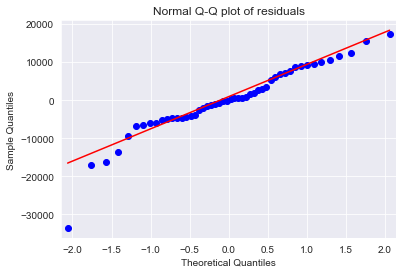

In [61]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

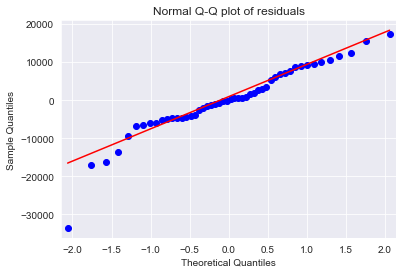

In [62]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [64]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

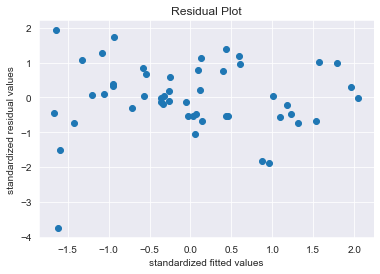

In [65]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

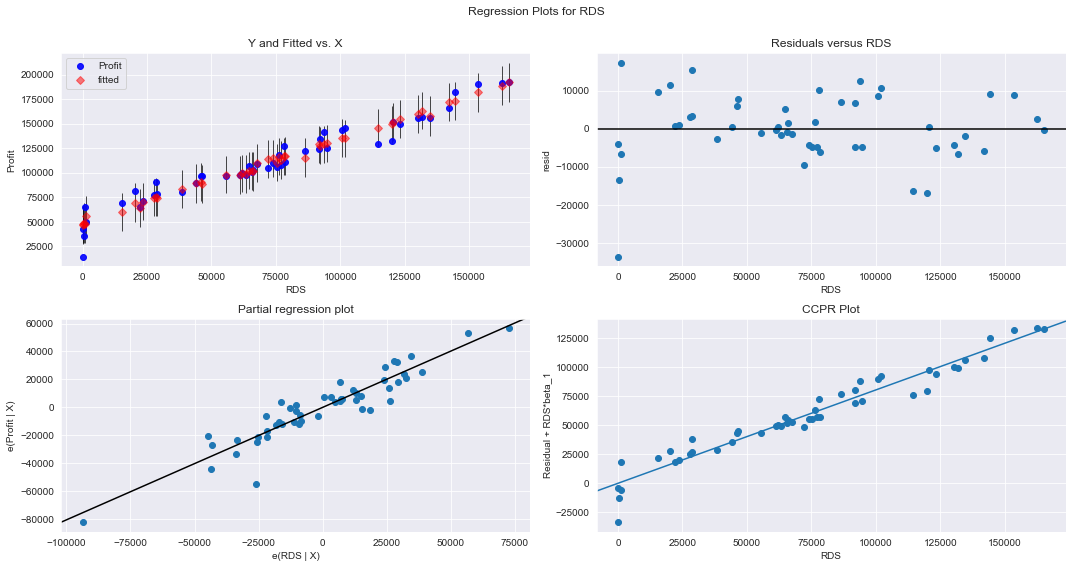

In [66]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

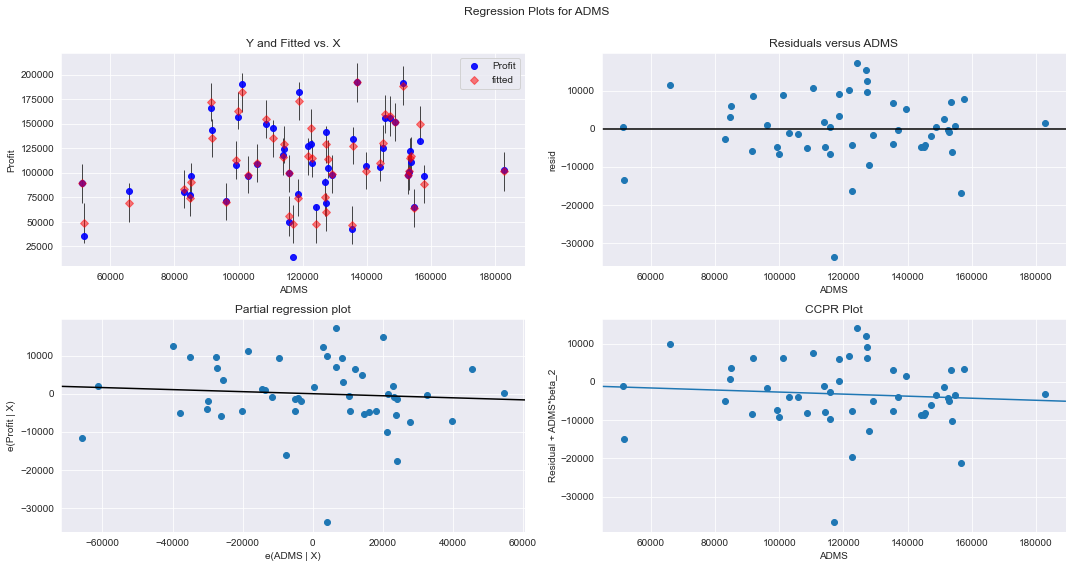

In [67]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

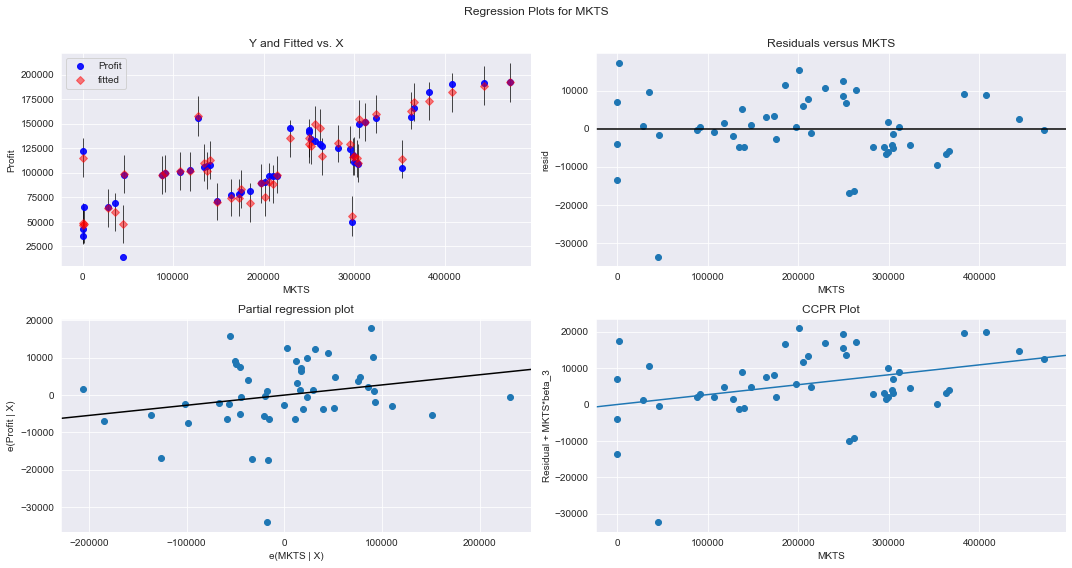

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [69]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

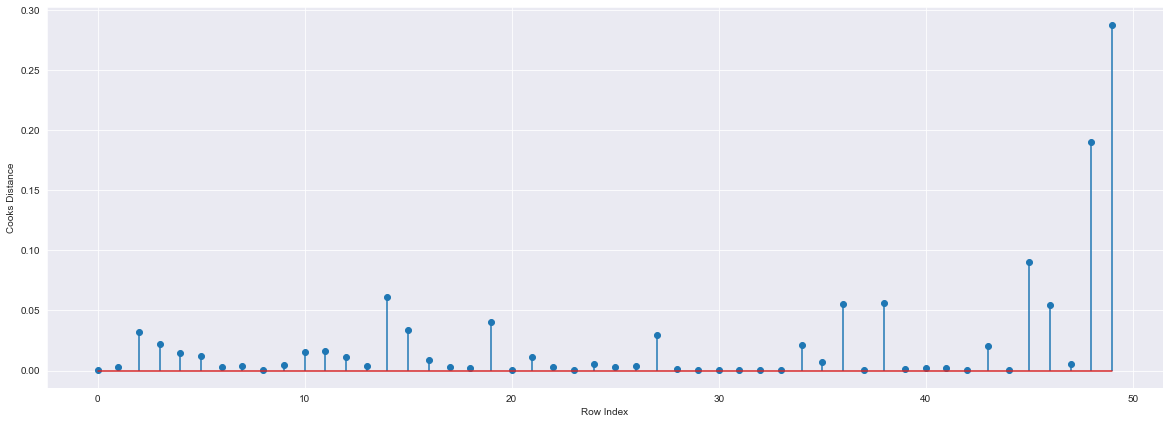

In [70]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

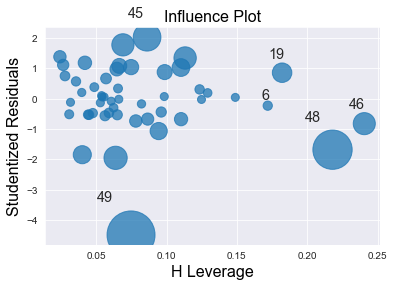

In [72]:
influence_plot(model)
plt.show()

In [73]:
k=startup1.shape[1]
n=startup1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [74]:
startup1[startup1.index.isin([49])]

RDS      ADMS      MKTS       State   Profit
49  0.0  116983.8  45173.06  California  14681.4

In [75]:
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
startup2

RDS       ADMS       MKTS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41

In [76]:
model2 = smf.ols("Profit~RDS+ADMS+MKTS",data=startup2).fit()

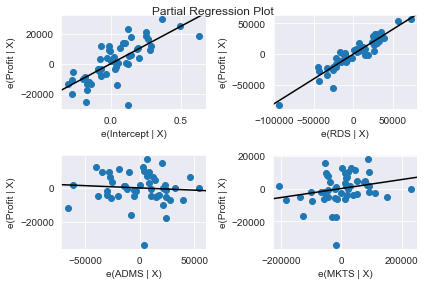

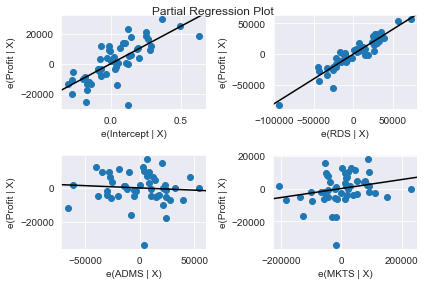

In [77]:
sm.graphics.plot_partregress_grid(model)

In [78]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=startup2).fit()
(c,_)=model2.get_influence().cooks_distance
c
np.argmax(c) , np.max(c)
startup2=startup2.drop(startup2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
startup2

RDS       ADMS       MKTS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73

In [79]:
final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=startup2).fit()
final_model.rsquared , final_model.aic
print("model accuracy is improved to",final_model.rsquared)

model accuracy is improved to 0.9626766170294073


In [80]:
final_model.rsquared

0.9626766170294073

In [81]:
startup2

RDS       ADMS       MKTS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73

In [82]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

RDS   ADMS    MKTS
0  70000  90000  140000

In [83]:
final_model.predict(new_data)

0    111027.02823
dtype: float64

In [84]:
pred_y=final_model.predict(startup2)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [85]:
df={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(df)
print('FINAL MODEL :-')
table

FINAL MODEL :-


Prep_Models  Rsquared
0        Model  0.950746
1  Final_Model  0.962677